In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from scipy.stats import skew

def feature_engineering_linear_analysis(data, dep_var, num_ind_vars, cat_ind_vars, kind='bar'):
    
    def dependent_variable_plots(data, column):
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

        # Histogram
        sns.histplot(data[column], ax=axes[0])
        axes[0].set_title(f"Histogram of {column}")

        # Box plot
        sns.boxplot(data[column], ax=axes[1])
        axes[1].set_title(f"Box plot of {column}")

        # Q-Q plot
        sm.qqplot(data[column], line='s', ax=axes[2])
        axes[2].set_title(f"Q-Q plot of {column} against a normal distribution")
        skewness = skew(data[column])
        axes[2].text(0.05, 0.95, f"Skewness: {skewness:.2f}", transform=axes[2].transAxes, ha='left', va='top')

        plt.tight_layout()
        plt.show()

    def independent_numeric_plots(data, column):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

        # Histogram
        sns.histplot(data[column], ax=axes[0])
        axes[0].set_title(f"Histogram of {column}")

        # Box plot
        sns.boxplot(data[column], ax=axes[1])
        axes[1].set_title(f"Box plot of {column}")

        plt.tight_layout()
        plt.show()

    # Dependent variable plots
    print(f"Dependent Variable: {dep_var}")
    dependent_variable_plots(data, dep_var)

    # Independent numeric variables plots
    for num_var in num_ind_vars:
        print(f"Independent Numeric Variable: {num_var}")
        independent_numeric_plots(data, num_var)

    # Independent categorical variables plots
    for cat_var in cat_ind_vars:
        print(f"Independent Categorical Variable: {cat_var}")
        plt.figure(figsize=(10, 4))
        sns.countplot(data=data, x=cat_var)
        plt.title(f"Count plot of {cat_var}")
        plt.show()

    # Relationship check (using the specified kind of plot)
    plot_functions = {
        "bar": sns.barplot,
        "line": sns.lineplot,
        "box": sns.boxplot,
        "swarm": sns.swarmplot,
        "violin": sns.violinplot,
        "strip": sns.stripplot
    }
    if kind not in plot_functions:
        kind = "bar"
    plot_func = plot_functions[kind]

    for cat_var in cat_ind_vars:
        print(f"Relationship Check: {dep_var} vs {cat_var}")
        plt.figure(figsize=(10, 4))
        plot_func(x=cat_var, y=dep_var, data=data)
        plt.title(f"{kind.title()} plot of {dep_var} vs {cat_var}")
        plt.show()

    # Pivot tables and line plots for two independent categorical variables
    for i, cat_var1 in enumerate(cat_ind_vars[:-1]):
        for cat_var2 in cat_ind_vars[i+1:]:
            print(f"Pivot Table and Line Plot: {cat_var1} vs {cat_var2}")
            pivot_table = data.pivot_table(index=cat_var1, columns=cat_var2, values=dep_var, aggfunc='mean')
            display(pivot_table)

            plt.figure(figsize=(10, 4))
            sns.lineplot(data=pivot_table)
            plt.title(f"Line plot of {dep_var} by {cat_var1} and {cat_var2}")
            plt.show()
            
    # Correlation matrix heatmap for continuous variables
    print("Correlation Matrix Heatmap:")
    corr_matrix = data[num_ind_vars + [dep_var]].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=.5)
    plt.xticks(rotation=45)
    plt.show()


In [32]:
# improved

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from scipy.stats import skew


def feature_engineering_linear_analysis(data, dep_var, num_ind_vars, cat_ind_vars, kind='bar'):
    '''
    Perform exploratory data analysis for linear regression analysis.

    Parameters:
    -----------
    data : pandas DataFrame
        The dataset to be used for analysis.
    dep_var : str
        The name of the dependent variable column.
    num_ind_vars : list of str
        The list of independent variable columns that are numeric.
    cat_ind_vars : list of str
        The list of independent variable columns that are categorical.
    kind : str, default='bar'
        The type of plot to use for the relationship check between the dependent variable and
        categorical independent variables. Possible values are 'bar', 'line', 'box', 'swarm', 'violin',
        and 'strip'.

    Returns:
    --------
    None
    '''
    # Check if the dependent variable is present in the dataset
    if dep_var not in data.columns:
        raise ValueError(f"The dependent variable {dep_var} is not present in the dataset.")

    # Check if the independent numeric variables are present in the dataset
    if not set(num_ind_vars).issubset(set(data.columns)):
        raise ValueError("The specified independent numeric variables are not present in the dataset.")

    # Check if the independent categorical variables are present in the dataset
    if not set(cat_ind_vars).issubset(set(data.columns)):
        raise ValueError("The specified independent categorical variables are not present in the dataset.")

    def dependent_variable_plots(data, column):
        '''
        Generate histograms, box plots, and Q-Q plots for a given dependent variable column.

        Parameters:
        -----------
        data : pandas DataFrame
            The dataset to be used for analysis.
        column : str
            The name of the dependent variable column.

        Returns:
        --------
        None
        '''
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

        # Histogram
        sns.histplot(data[column], ax=axes[0])
        axes[0].set_title(f"Histogram of {column}")

        # Box plot
        sns.boxplot(data[column], ax=axes[1])
        axes[1].set_title(f"Box plot of {column}")

        # Q-Q plot
        sm.qqplot(data[column], line='s', ax=axes[2])
        axes[2].set_title(f"Q-Q plot of {column} against a normal distribution")
        skewness = skew(data[column])
        axes[2].text(0.05, 0.95, f"Skewness: {skewness:.2f}", transform=axes[2].transAxes, ha='left', va='top')

        plt.tight_layout()
        plt.show()

    def independent_numeric_plots(data, column):
        '''
        Generate histograms and box plots for a given numeric independent variable column.

        Parameters:
        -----------
        data : pandas DataFrame
            The dataset to be used for analysis.
        column : str
            The name of the numeric independent variable column.

        Returns:
        --------
        None
        '''
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

        # Histogram
        sns.histplot(data[column], ax=axes[0])
        axes[0].set_title(f"Histogram of {column}")

        # Box plot
        sns.boxplot(data[column], ax=axes[1])
        axes[1].set_title(f"Box plot of {column}")

        plt.tight_layout()
        plt.show()

    # Dependent variable plots
    print(f"Dependent Variable: {dep_var}")
    dependent_variable_plots(data, dep_var)

    # Independent numeric variables plots
    for num_var in num_ind_vars:
        print(f"Independent Numeric Variable: {num_var}")
        independent_numeric_plots(data, num_var)

    # Independent categorical variables plots
    for cat_var in cat_ind_vars:
        print(f"Independent Categorical Variable: {cat_var}")
        plt.figure(figsize=(10, 4))
        sns.countplot(data=data, x=cat_var)
        plt.title(f"Count plot of {cat_var}")
        plt.show()

    # Relationship check (using the specified kind of plot)
    plot_functions = {
        "bar": sns.barplot,
        "line": sns.lineplot,
        "box": sns.boxplot,
        "swarm": sns.swarmplot,
        "violin": sns.violinplot,
        "strip": sns.stripplot
    }
    if kind not in plot_functions:
        kind = "bar"
    plot_func = plot_functions[kind]

    for catvar in cat_ind_vars:
        print(f"Relationship Check: {dep_var} vs {cat_var}")
        plt.figure(figsize=(10, 4))
        plot_func(x=cat_var, y=dep_var, data=data)
        plt.title(f"{kind.title()} plot of {dep_var} vs {cat_var}")
        plt.show()

    # Pivot tables and line plots for two independent categorical variables
    for i, cat_var1 in enumerate(cat_ind_vars[:-1]):
        for cat_var2 in cat_ind_vars[i+1:]:
            print(f"Pivot Table and Line Plot: {cat_var1} vs {cat_var2}")
            pivot_table = data.pivot_table(index=cat_var1, columns=cat_var2, values=dep_var, aggfunc='mean')
            display(pivot_table)

            plt.figure(figsize=(10, 4))
            sns.lineplot(data=pivot_table)
            plt.title(f"Line plot of {dep_var} by {cat_var1} and {cat_var2}")
            plt.show()

    # Correlation matrix heatmap for continuous variables
    print("Correlation Matrix Heatmap:")
    corr_matrix = data[num_ind_vars + [dep_var]].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=.5)
    plt.xticks(rotation=45)
    plt.show()

In [6]:
df = pd.read_csv('/home/young78703/Data_Science_Project/data/melb_data.csv')
df.rename(columns={'Longtitude':'Longitude'},inplace=True)

import pandas as pd
import numpy as np

def impute_nulls(df):
    """
    Impute null values in a Pandas DataFrame based on the data type of each column.
    - For float columns, impute with the mean.
    - For integer columns, impute with the median.
    - For object columns, impute with the mode.
    - For datetime columns, impute with the most recent or most frequent date.
    - For timedelta columns, impute with the mode.
    - For bool columns, impute with the mode.
    - For category columns, impute with the mode.
    - For complex columns, impute with the mean.
    """
    # Get data types of all columns
    dtypes = df.dtypes

    # Iterate over all columns
    for col in df.columns:
        # Check if column contains null values
        if df[col].isnull().sum() > 0:
            # Get data type of column
            dtype = dtypes[col]
            # Impute null values based on data type
            if dtype == 'float64' or dtype == 'float32' or dtype == 'float16':
                df[col].fillna(df[col].mean(), inplace=True)
            elif dtype == 'int64' or dtype == 'int32' or dtype == 'int16' or dtype == 'int8':
                df[col].fillna(df[col].median(), inplace=True)
            elif dtype == 'object':
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif dtype == 'datetime64':
                df[col].fillna(method='bfill', inplace=True)
            elif dtype == 'timedelta64':
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif dtype == 'bool':
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif dtype.name == 'category':
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif dtype == 'complex64' or dtype == 'complex128':
                df[col].fillna(df[col].mean(), inplace=True)
    return df

impute_nulls(df)

from scipy import stats

def drop_outliers_by_zscores(data, column, lower_zscore, upper_zscore, inplace=False):
    """
    Drops rows from a Pandas DataFrame based on z-scores of a given column.

    Parameters:
    data (pandas.DataFrame): The input data.
    column (str): The name of the column to use for computing z-scores.
    lower_zscore (float): The lower z-score boundary.
    upper_zscore (float): The upper z-score boundary.
    inplace (bool): If True, updates the DataFrame directly. If False, returns a new DataFrame with outliers dropped.

    Returns:
    pandas.DataFrame or None: The modified DataFrame with outliers dropped, if inplace is False;
                              None, if inplace is True.
    """
    # Check input arguments
    if column not in data.columns:
        raise ValueError("Column '%s' not found in data." % column)
    if not np.isfinite(lower_zscore):
        raise ValueError("Lower z-score boundary must be finite.")
    if not np.isfinite(upper_zscore):
        raise ValueError("Upper z-score boundary must be finite.")

    # Compute z-scores
    z_scores = pd.Series(stats.zscore(data[column]), index=data.index)

    # Drop outliers outside boundaries
    mask = (z_scores >= upper_zscore) | (z_scores <= lower_zscore)
    
    if inplace:
        data.drop(data[mask].index, inplace=True)
        return None
    else:
        return data.loc[~mask]

drop_outliers_by_zscores(df, 'Price', -3.5, 3.5, inplace=True)

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from typing import Optional

def encode_categorical_column(data: pd.DataFrame, column: str, mapping: Optional[dict] = None) -> pd.DataFrame:
    """
    Encode a categorical column in the input dataframe using LabelEncoder or mapping.

    :param data: input dataframe
    :param column: column name to be encoded
    :param mapping: optional dictionary defining the mapping for ordinal variables; defaults to None
    :return: dataframe with the specified column encoded
    """
    data = data.copy()

    if mapping is not None:
        # Use mapping for ordinal categorical variables
        data[column] = data[column].map(mapping)
    else:
        # Use LabelEncoder for nominal categorical variables
        encoder = LabelEncoder()
        encoded = encoder.fit_transform(data[column])
        data[column] = encoded

    return data

encode_categorical_column(df, 'Method')
encode_categorical_column(df, 'Type')


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,0,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,0,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,0,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,0,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,0,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,0,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,151.96765,1981.000000,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,0,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.00000,1995.000000,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,0,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,151.96765,1997.000000,Moreland,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,0,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.00000,1920.000000,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
# improved version

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

def agglomerative_clustering_geological_data(data, drop_columns, n_clusters=None, figsize=(15, 12), dot_size=20,
                                            hue='Cluster', col=None, style=None, size=None, palette='coolwarm',
                                            alpha=1, x_feature='Longitude', y_feature='Latitude', sizes=(2, 200)):
    """
    Perform Agglomerative Clustering on geological data and visualize the results.

    :param data: DataFrame - The input data containing features.
    :param drop_columns: List of str - Columns to drop from the data before performing clustering.
    :param n_clusters: int, optional - The number of clusters for Agglomerative Clustering. If None, the optimal number of clusters will be determined using the dendrogram.
    :param figsize: tuple, optional - The figure size of the plot.
    :param dot_size: int, optional - The size of the dots in the plot.
    :param hue: str, optional - The hue (color) parameter for seaborn plots.
    :param col: str, optional - The col (column) parameter for seaborn FacetGrid plots.
    :param style: str, optional - The style parameter for seaborn scatterplot.
    :param size: str, optional - The size parameter for seaborn scatterplot.
    :param palette: str, optional - The color palette for seaborn plots.
    :param alpha: float, optional - The alpha parameter for seaborn plots.
    :param x_feature: str, optional - The x-axis feature in the plot.
    :param y_feature: str, optional - The  y-axis feature in the plot.
    :param sizes: tuple, optional - The sizes parameter for seaborn scatterplot.

    :return: DataFrame - The input data with an additional 'Cluster' column representing the cluster labels.
    """
    try:
        # Create a copy of the input data and drop the specified columns
        original_data = data.copy()
        X = data.drop(columns=drop_columns)
        
        # Standardize the remaining features using StandardScaler
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # If the number of clusters is not provided, determine the optimal number using the dendrogram
        if n_clusters is None:
            plt.figure(figsize=figsize)
            plt.title('Dendrogram')
            plt.xlabel('Data Points')
            plt.ylabel('Euclidean Distance')
            Z = linkage(X_scaled, method='ward')
            dendrogram(Z)
            plt.show()

            n_clusters = int(input("Enter the optimal number of clusters based on the dendrogram: "))
        
        # Perform Agglomerative Clustering with the determined number of clusters    
        hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
        cluster_labels = hc.fit_predict(X_scaled)
        
        # Add the cluster labels to the original data
        original_data['Cluster'] = cluster_labels.astype('object')

        # Visualize the clustered data using seaborn
        if col is not None:
            g = sns.FacetGrid(original_data, col=col, height=figsize[1]/X[col].nunique(), aspect=figsize[0]/figsize[1])
            g.map_dataframe(sns.scatterplot, x=x_feature, y=y_feature, hue=hue, size=size, style=style, alpha=alpha, palette=palette, s=dot_size)
            g.set_titles('{col_name}')
            g.add_legend(title=original_data[col].name)
        else:
            plt.figure(figsize=figsize)
            sns.scatterplot(x=x_feature, y=y_feature, data=original_data, hue=hue, size=size, style=style, alpha=alpha, palette=palette, s=dot_size)
            plt.title('Clusters')
            plt.xlabel(x_feature)
            plt.ylabel(y_feature)
            plt.legend()
            plt.show()
        
        return original_data
        
    except Exception as e:
        print(f"Error: {e}")
        return None


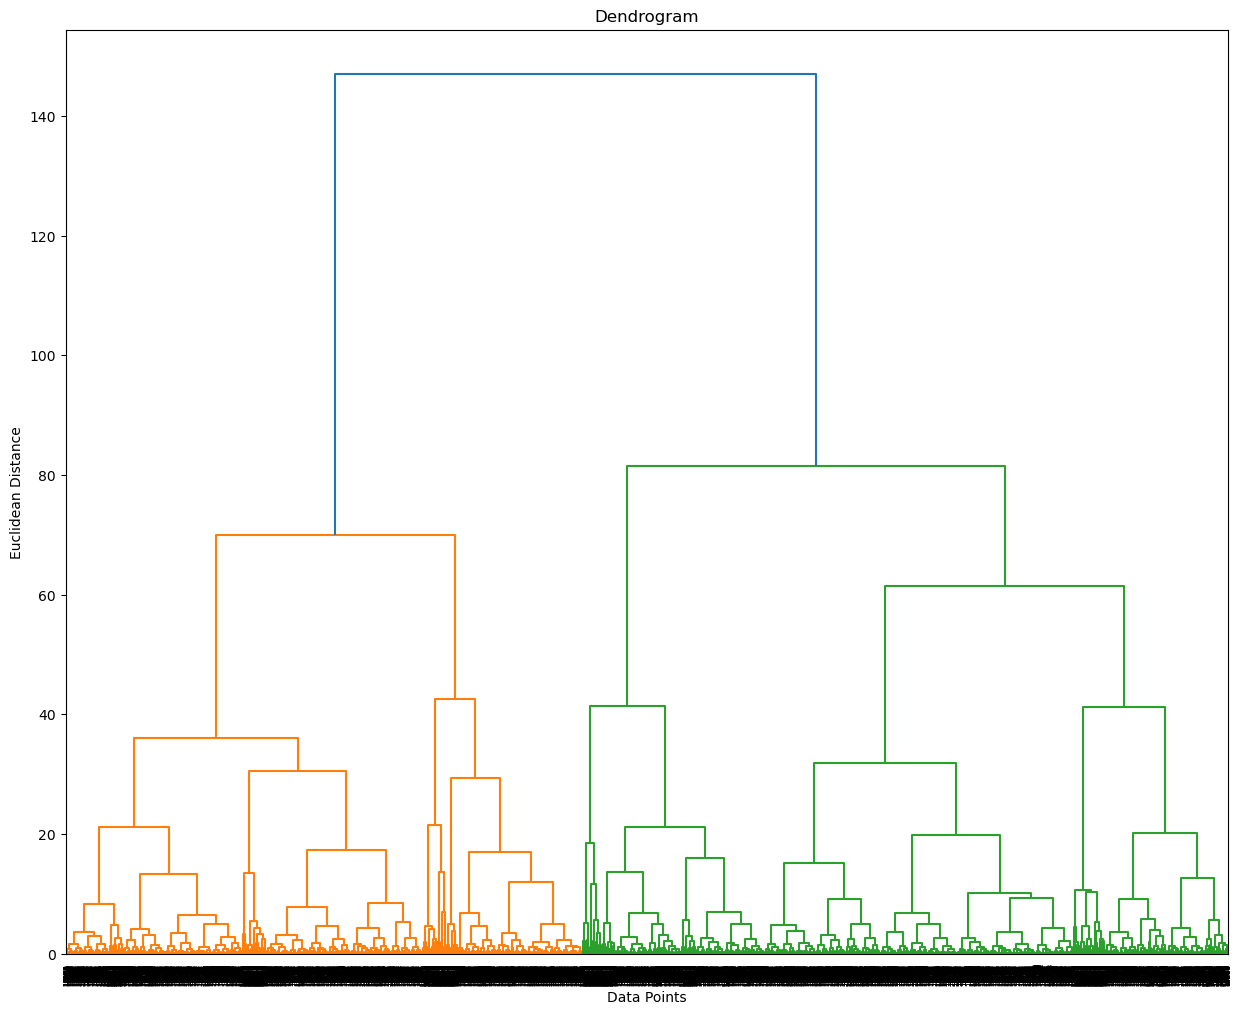

Enter the optimal number of clusters based on the dendrogram: 5


/home/young78703/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


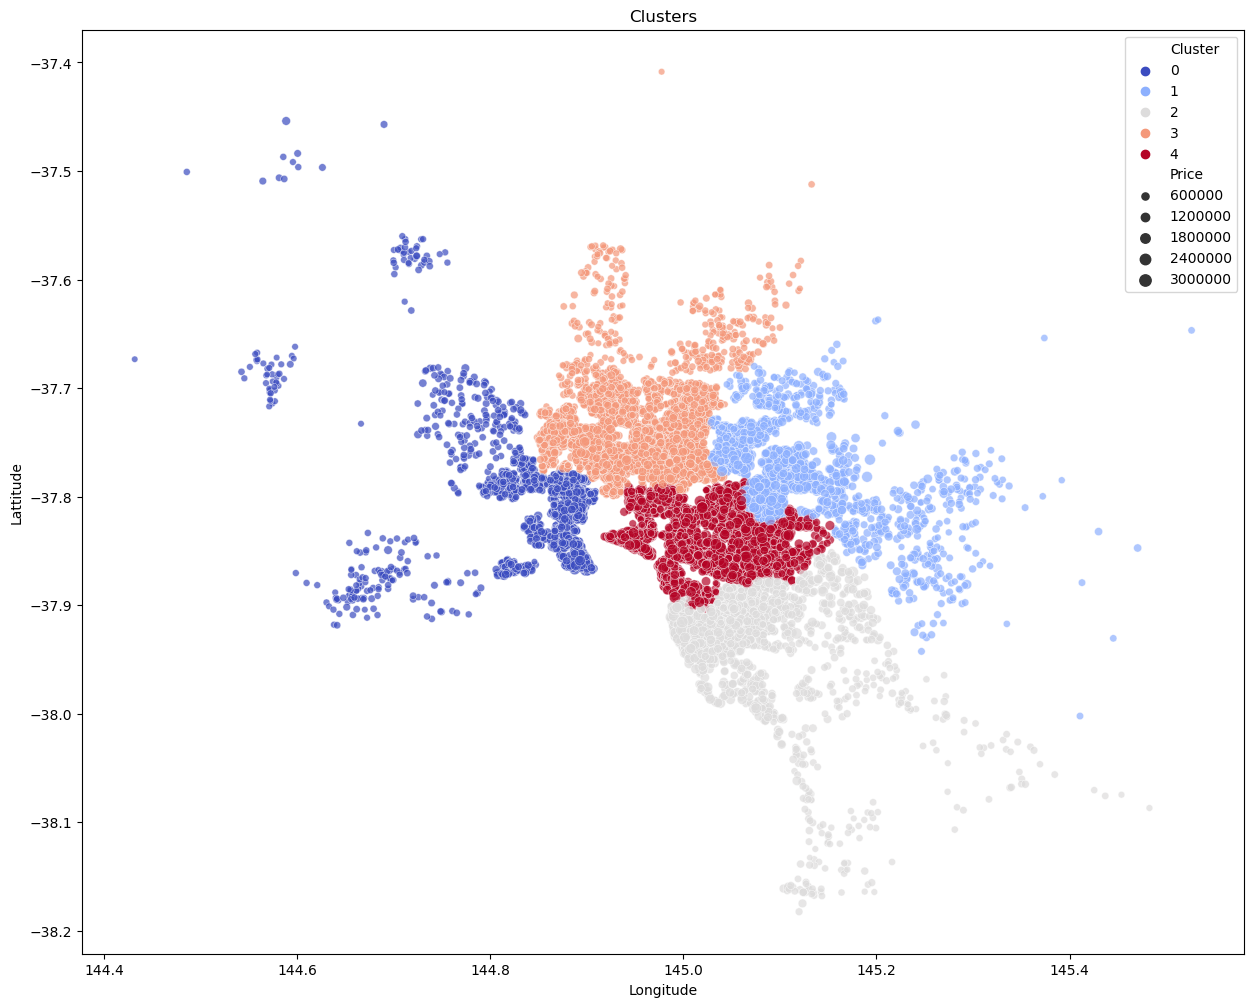

In [7]:
drop_columns=['Suburb', 'Address','Type','Rooms', 'Method', 'SellerG', 'Date', 'Bedroom2', 'Distance', 'Postcode', 'Price', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname', 'Propertycount']
df = agglomerative_clustering_geological_data(df, drop_columns, n_clusters=None, figsize=(15, 12), dot_size=30, hue='Cluster', palette='coolwarm', size='Price', sizes=(1,500), alpha=0.7, x_feature='Longitude', y_feature='Lattitude')


Dependent Variable: Price


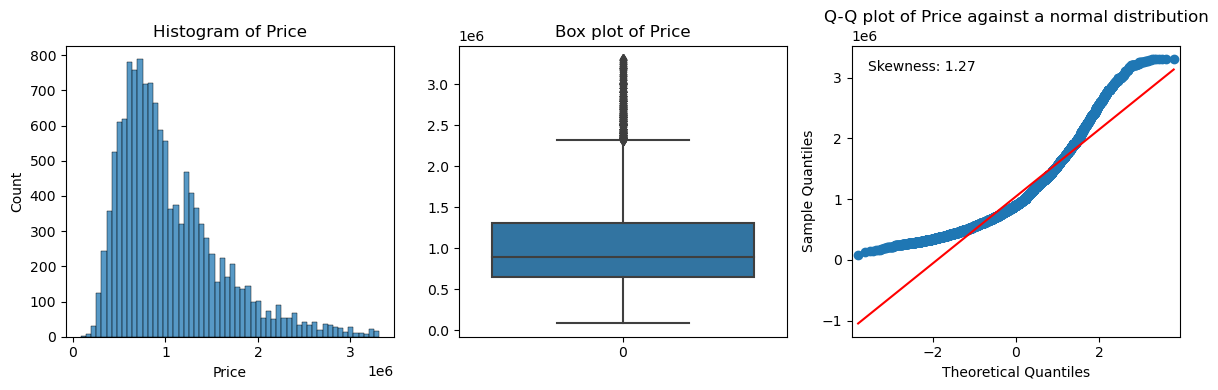

Independent Numeric Variable: Distance


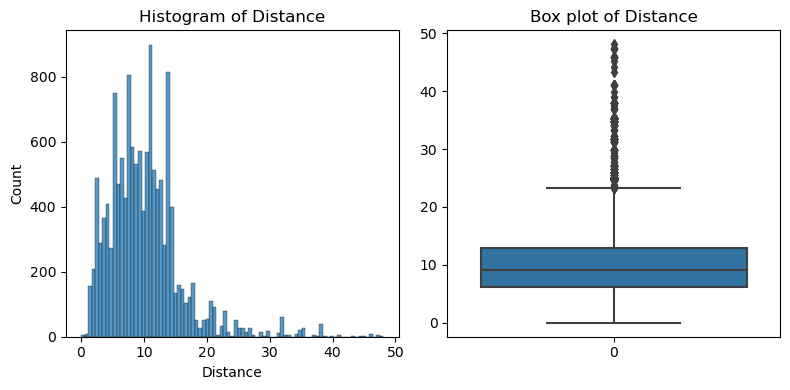

Independent Numeric Variable: Rooms


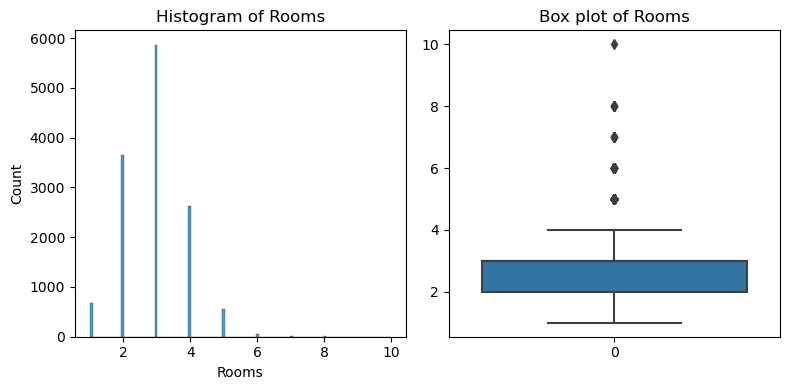

Independent Numeric Variable: Landsize


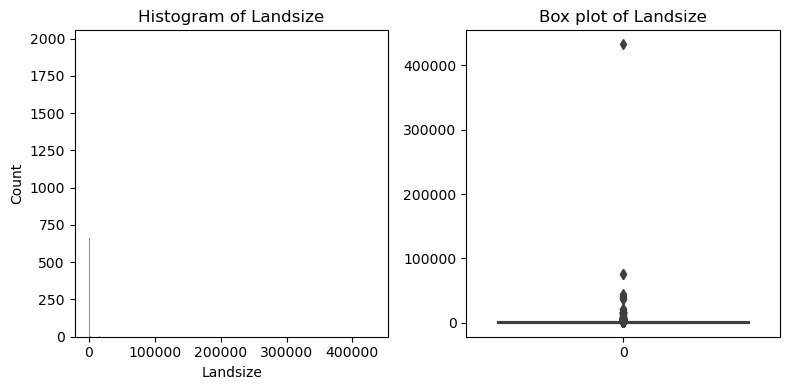

Independent Numeric Variable: Propertycount


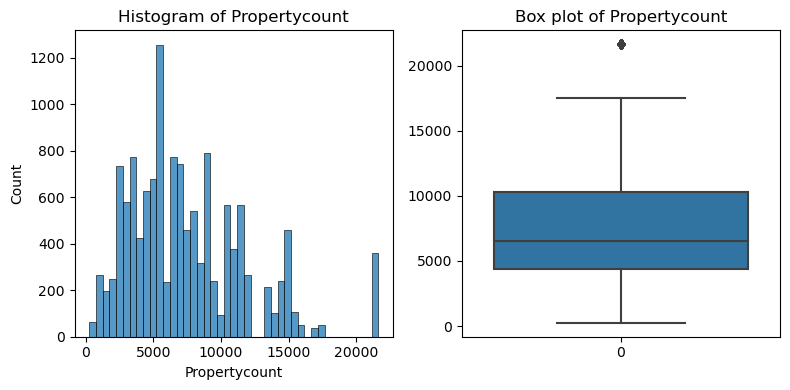

Independent Categorical Variable: Cluster


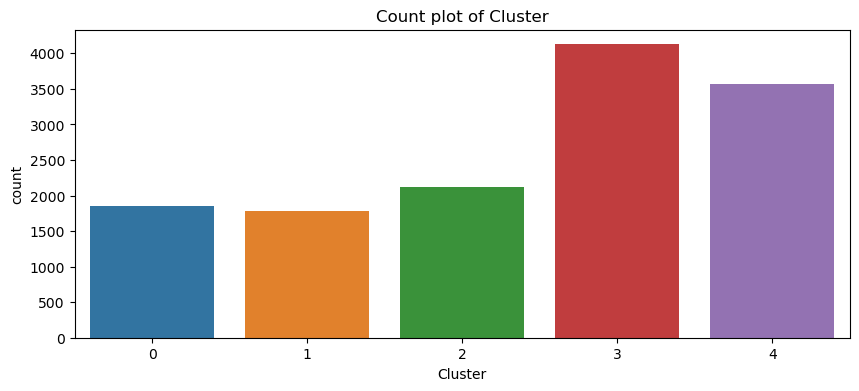

Independent Categorical Variable: Type


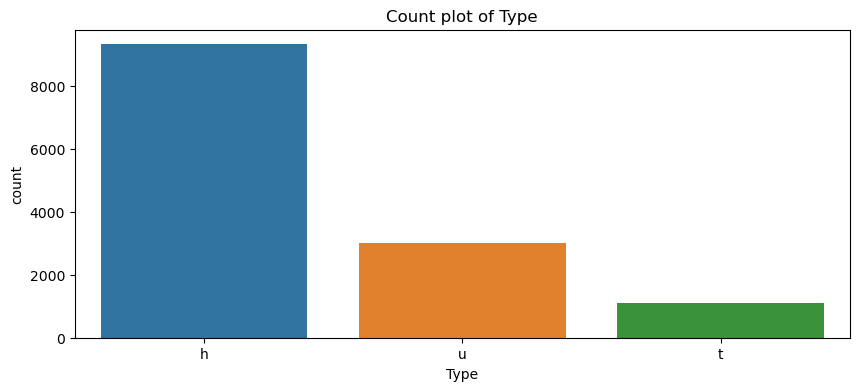

Independent Categorical Variable: Method


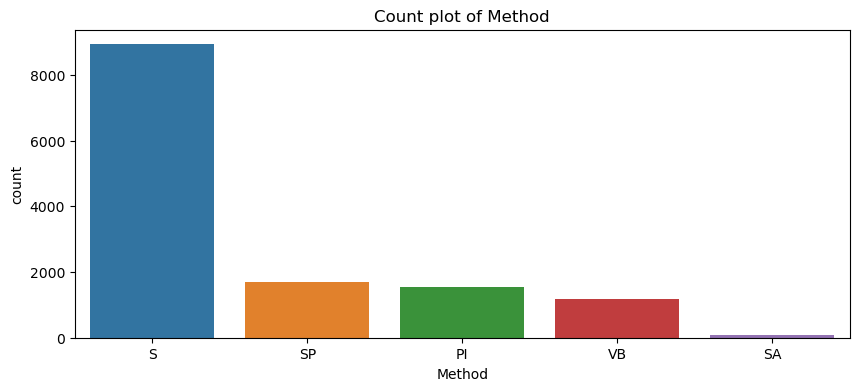

Relationship Check: Price vs Method


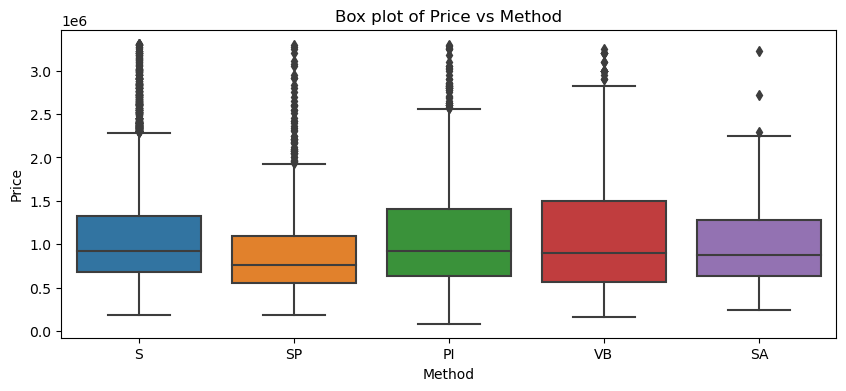

Relationship Check: Price vs Method


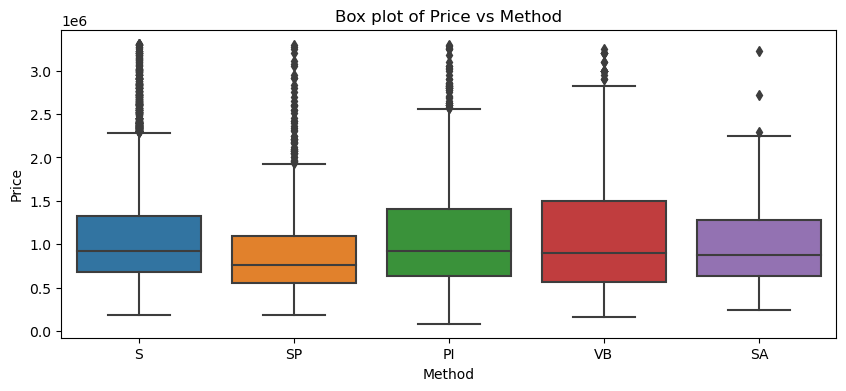

Relationship Check: Price vs Method


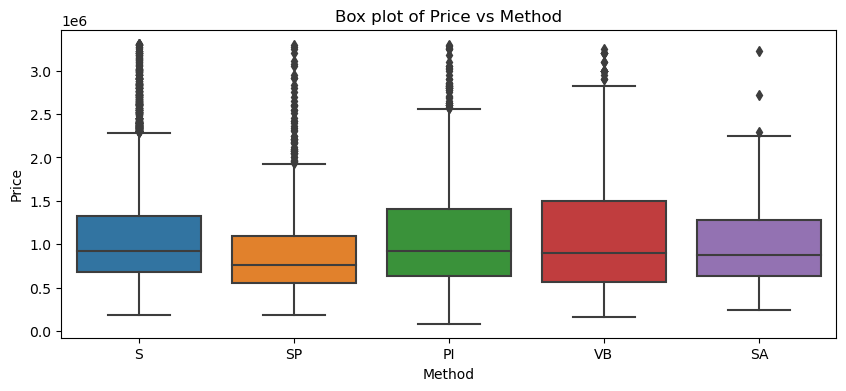

Pivot Table and Line Plot: Cluster vs Type


Type,h,t,u
Cluster,,,
0,8.423745e+05,6.888904e+05,449520.214634
1,1.228762e+06,9.404199e+05,658549.753695
2,1.335995e+06,1.109955e+06,675702.548077
3,1.004170e+06,7.032570e+05,500379.776224
4,1.686290e+06,1.194714e+06,648167.621530


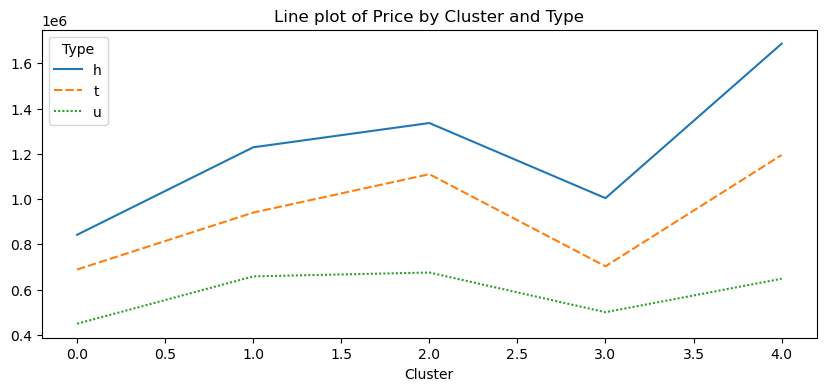

Pivot Table and Line Plot: Cluster vs Method


Method,PI,S,SA,SP,VB
Cluster,,,,,
0,7.508962e+05,7.958615e+05,6.593000e+05,7.922952e+05,7.708977e+05
1,1.304857e+06,1.115480e+06,1.149971e+06,9.683773e+05,1.291588e+06
2,1.163891e+06,1.190265e+06,1.110386e+06,1.061706e+06,1.297338e+06
3,8.930424e+05,9.070799e+05,8.508235e+05,8.344855e+05,8.513980e+05
4,1.261739e+06,1.258460e+06,1.239976e+06,9.374720e+05,1.206804e+06


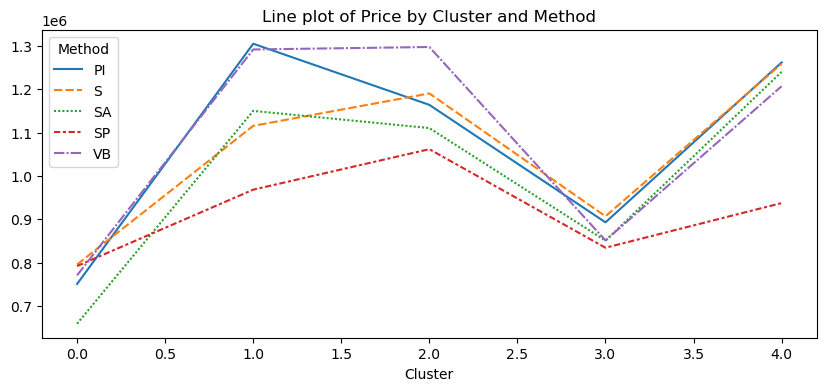

Pivot Table and Line Plot: Type vs Method


Method,PI,S,SA,SP,VB
Type,,,,,
h,1.292485e+06,1.187272e+06,1.178348e+06,1.040711e+06,1.410129e+06
t,9.105410e+05,9.373209e+05,7.510000e+05,8.861654e+05,9.903645e+05
u,5.627673e+05,6.407274e+05,5.970000e+05,5.418999e+05,5.476538e+05


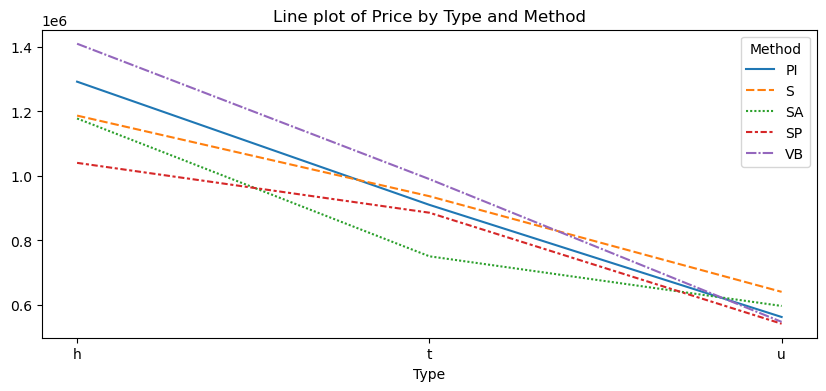

Correlation Matrix Heatmap:


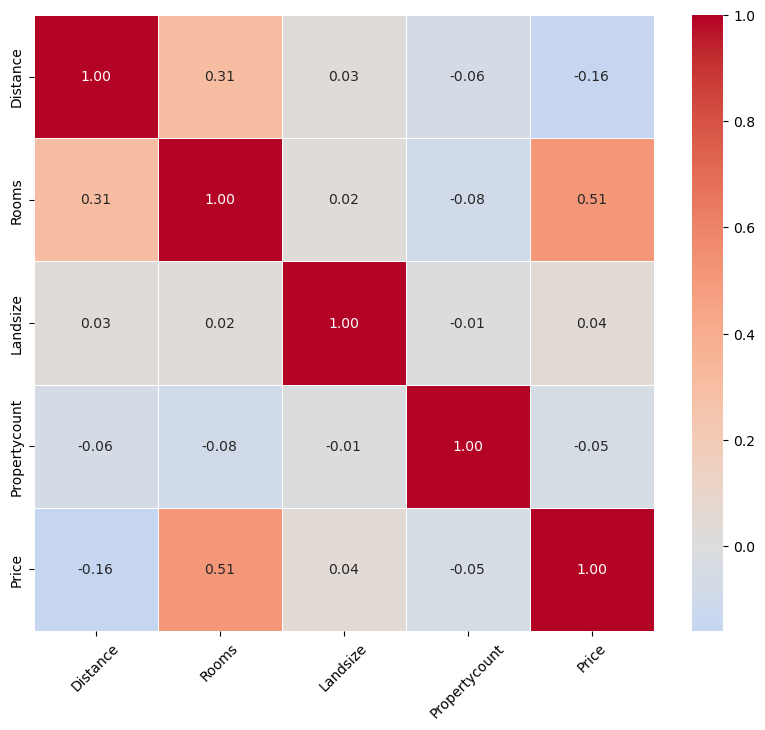

In [33]:
# Example usage

dep_var = 'Price'
num_ind_vars =['Distance', 'Rooms', 'Landsize', 'Propertycount']
cat_ind_vars =['Cluster','Type','Method',]
drop_columns = ['Suburb', 'Address', 'SellerG', 'Date', 'Bedroom2','Car', 'Postcode','YearBuilt', 'Car', 'Bathroom', 'BuildingArea', 'CouncilArea', 'Regionname', 'Lattitude', 'Longitude' ]

feature_engineering_linear_analysis(df, dep_var, num_ind_vars, cat_ind_vars, kind='box')

In [ ]:
# Example usage
if __name__ == '__main__':
    # Load example data
    data = sns.load_dataset('tips')

    # Specify variables
    dep_var = 'tip'
    num_ind_vars = ['total_bill', 'size']
    cat_ind_vars = ['sex', 'smoker', 'day', 'time']

    # Perform analysis
    feature_engineering_linear_analysis(data, dep_var, num_ind_vars, cat_ind_vars, kind='box')